# BERT Introduction
https://github.com/google-research/bert

BERT, or **Bidirectional Encoder Representations from Transformers**, is a new method of pre-training language representations which obtains state-of-the-art results on a wide array of Natural Language Processing (NLP) tasks.

We then train a large model (12-layer to 24-layer Transformer) on a large corpus (Wikipedia + BookCorpus) for a long time (1M update steps), and that's BERT.

Using BERT has two stages: Pre-training and fine-tuning.

## Pre-trained models
Each .zip file contains three items:

* A TensorFlow checkpoint (bert_model.ckpt) containing the pre-trained weights (which is actually 3 files).
* A vocab file (vocab.txt) to map WordPiece to word id.
* A config file (bert_config.json) which specifies the hyperparameters of the model.

## Fine-tuning with BERT
This code was tested with **TensorFlow 1.11.0**. It was tested with Python2 and Python3 (but more thoroughly with Python2, since this is what's used internally in Google).

# 分类任务

## Sentence (and sentence-pair) classification tasks
Before running this example you must download the GLUE data by running this script and unpack it to some directory `$GLUE_DIR`. Next, download the BERT-Base checkpoint and unzip it to some directory `$BERT_BASE_DIR`.

This example code fine-tunes BERT-Base on the Microsoft Research Paraphrase Corpus (MRPC) corpus, which only contains 3,600 examples and can fine-tune in a few minutes on most GPUs.

In [ ]:
export BERT_BASE_DIR=/Users/luoyonggui/Documents/nlpdata/uncased_L-12_H-768_A-12
export GLUE_DIR=/Users/luoyonggui/PycharmProjects/mayiexamples/nlp/bert_ops/glue_data

python run_classifier.py \
  --task_name=MRPC \
  --do_train=true \
  --do_eval=true \
  --data_dir=$GLUE_DIR/MRPC \
  --vocab_file=$BERT_BASE_DIR/vocab.txt \
  --bert_config_file=$BERT_BASE_DIR/bert_config.json \
  --init_checkpoint=$BERT_BASE_DIR/bert_model.ckpt \
  --max_seq_length=128 \
  --train_batch_size=32 \
  --learning_rate=2e-5 \
  --num_train_epochs=3.0 \
  --output_dir=$GLUE_DIR/MRPC/mrpc_output/

15:32:00 开始 18:00训练完。。。cpu
和官网给出的结果基本上差不多吧！

        ***** Eval results *****
        eval_accuracy = 0.8357843
        eval_loss = 0.5335977
        global_step = 343
        loss = 0.5335977

### Prediction from classifier
Once you have trained your classifier you can use it in inference mode by using the `--do_predict=true` command. You need to have a file named test.tsv in the input folder. Output will be created in file called test_results.tsv in the output folder. Each line will contain output for each sample, columns are the class probabilities.

In [ ]:
export BERT_BASE_DIR=/Users/luoyonggui/Documents/nlpdata/uncased_L-12_H-768_A-12
export GLUE_DIR=/Users/luoyonggui/PycharmProjects/mayiexamples/nlp/bert_ops/glue_data

export TRAINED_CLASSIFIER=$GLUE_DIR/MRPC/mrpc_output/

python run_classifier.py \
  --task_name=MRPC \
  --do_predict=true \
  --data_dir=$GLUE_DIR/MRPC \
  --vocab_file=$BERT_BASE_DIR/vocab.txt \
  --bert_config_file=$BERT_BASE_DIR/bert_config.json \
  --init_checkpoint=$TRAINED_CLASSIFIER \
  --max_seq_length=128 \
  --output_dir=$GLUE_DIR/MRPC/mrpc_output/predict

18:14开始 18:22结束
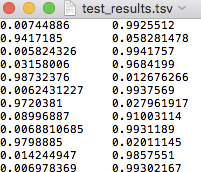        

# BERT_Utils 
一行代码使用BERT生成句向量，BERT做文本分类、文本相似度计算
https://github.com/terrifyzhao/bert-utils


* 下载BERT中文模型

下载地址: https://storage.googleapis.com/bert_models/2018_11_03/chinese_L-12_H-768_A-12.zip

* 把下载好的模型添加到当前目录下
如果不放在当前目录下，需要打开args.py修改file_path


## 句向量生成
这个还是有点小作用的，目前生成句向量的方法是，各个词向量相加求平均，看看用bert怎么做

生成句向量不需要做fine tune，使用预先训练好的模型即可，可参考extract_feature.py的main方法，注意参数必须是一个list。

首次生成句向量时需要加载graph，并在output_dir路径下生成一个新的graph文件，因此速度比较慢，再次调用速度会很快

In [1]:
import sys
sys.path.append('/Users/luoyonggui/Documents/temp/bert-utils')

In [4]:
from extract_feature import BertVector
bv = BertVector()
bv.encode(['今天天气不错'])

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/

I1113 16:28:42.339045 140735481316224 graph_util_impl.py:364] Converted 181 variables to const ops.
I:BERT_VEC:[graph:opt: 97]:optimize...
I1113 16:28:42.507504 140735481316224 graph.py:97] optimize...
W1113 16:28:46.629857 140735481316224 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow/python/tools/optimize_for_inference_lib.py:113: remove_training_nodes (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.remove_training_nodes`
I:BERT_VEC:[graph:opt:106]:write graph to a tmp file: tmp/result/graph
I1113 16:28:52.457321 140735481316224 graph.py:106] write graph to a tmp file: tmp/result/graph
E:BERT_VEC:[graph:opt:111]:fail to optimize the graph!
E1113 16:28:52.985811 140735481316224 graph.py:111] fail to optimize the graph!
E:BERT_VEC:[graph:opt:112]:tmp/result/graph; No such file or directory
E1113 16:28:52.990381 140735481316224 gr

KeyboardInterrupt: 

## 文本分类

这个功能意义不大，可以直接用bert自带的，修改一下预处理方法就可以了！
